In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn import model_selection


from sklearn.model_selection import StratifiedKFold


In [2]:
df = pd.read_csv('/home/chris/Documents/Datasets/creditcard.csv')

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Class"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

train_set = train_set.reset_index(drop = True)
credit_card = train_set.copy()

splitcv = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=43)
for train_index, cv_index in splitcv.split(credit_card, credit_card["Class"]):
    train60_set = credit_card.loc[train_index]
    cv_set = credit_card.loc[cv_index]
    
train60_set = train60_set.reset_index(drop = True)
cv_set = cv_set.reset_index(drop = True)
credit_card60 = train60_set.copy()
credit_card_cv = cv_set.copy()

In [4]:
m,n = credit_card.shape
X_train = credit_card.iloc[:,0:(n-1)]
y_train = credit_card.iloc[:,n-1]

data = X_train
scaler = StandardScaler()
scaler.fit(data)
X_train_scaled = scaler.transform(data)

In [5]:
models = []
models.append(('KNN=3', KNeighborsClassifier(n_neighbors=3)))
models.append(('KNN=5', KNeighborsClassifier(n_neighbors=5)))
models.append(('KNN=8', KNeighborsClassifier(n_neighbors=8)))
#models.append(('CART', DecisionTreeClassifier())) takes too long
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC())) takes too long
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=4)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold,
                                                 scoring='average_precision')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN=3: 0.786419 (0.020771)
KNN=5: 0.791952 (0.027219)
KNN=8: 0.795798 (0.025369)


In [6]:
models = []
models.append(('KNN=3p=1', KNeighborsClassifier(n_neighbors=3, p=1)))
models.append(('KNN=5p=1', KNeighborsClassifier(n_neighbors=5, p=1)))
models.append(('KNN=8p=1', KNeighborsClassifier(n_neighbors=8, p=1)))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=4)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold,
                                                 scoring='average_precision')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN=3p=1: 0.798618 (0.019882)
KNN=5p=1: 0.796730 (0.024835)
KNN=8p=1: 0.795295 (0.024471)


In [6]:
m,n = credit_card60.shape
X_train60 = credit_card60.iloc[:,0:(n-1)]
y_train60 = credit_card60.iloc[:,n-1]
X_cv = credit_card_cv.iloc[:,0:(n-1)]
y_cv = credit_card_cv.iloc[:,n-1]

data = X_train60
scaler = StandardScaler()
scaler.fit(data)
X_train60_scaled = scaler.transform(data)

data = X_cv
scaler = StandardScaler()
scaler.fit(data)
X_cv_scaled = scaler.transform(data)

In [8]:
KNNclf = KNeighborsClassifier(n_neighbors=3, p=1) #use best parameters here
KNNclf.fit(X_train60_scaled,y_train60)
y_cv_pred_prob = KNNclf.predict_proba(X_cv_scaled)


Text(0.5,1,'2-class Precision-Recall curve: AUC=0.89')

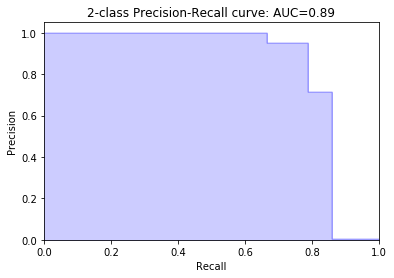

In [10]:
precision, recall, threshold = precision_recall_curve(y_cv, y_cv_pred_prob[:,1])
area_under_curve = auc(recall,precision)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          area_under_curve))

In [11]:
print(precision, recall, threshold)

[0.001738   0.71428571 0.95121951 1.         1.        ] [1.         0.85858586 0.78787879 0.66666667 0.        ] [0.         0.33333333 0.66666667 1.        ]


In [7]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=42)
X_train60_scaled_resampled, y_train60_resampled = cnn.fit_sample(X_train60_scaled, y_train60)

In [8]:
X_train60_scaled_resampled.shape

(1150, 30)

In [19]:
X_train60_scaled_resampled[0]

array([-0.11832264, -0.23782891,  0.09282648, -0.15499859, -0.68273855,
        1.34318681,  1.11327093,  0.83359515,  0.03380977,  0.35209188,
        0.43018706,  1.45771726,  1.10283356,  0.20637267, -0.25558285,
       -0.24237139, -1.54096944,  0.21038567, -2.59976624, -1.41754509,
        0.02023391, -0.28251622,  0.38805645,  0.69216932, -3.03169737,
       -1.70738748,  0.50788651,  0.02435773, -0.8377755 , -0.20139296])

In [20]:
import collections

collections.Counter(y_train60_resampled)

Counter({0: 855, 1: 295})

In [21]:
np.savetxt("/home/chris/Documents/ml/credit-card-fraud/cnntrain60.csv",X_train60_scaled_resampled,delimiter=",")

In [10]:
np.savetxt("/home/chris/Documents/ml/credit-card-fraud/cnnlabel60.csv",y_train60_resampled,delimiter=",")

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_neighbors':[3,5,8,10,12,15], 'p':[1,2] }
]
KNN = KNeighborsClassifier()
grid_search = GridSearchCV(KNN, param_grid,scoring = 'average_precision' ,cv = 4,)
grid_search.fit(X_train60_scaled_resampled, y_train60_resampled)

GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [3, 5, 8, 10, 12, 15], 'p': [1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='average_precision', verbose=0)

In [12]:
grid_search.best_params_, grid_search.best_score_

({'n_neighbors': 15, 'p': 2}, 0.8427733622159077)

0.8361794126509993


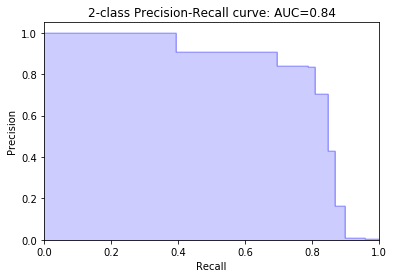

In [18]:
KNN = KNeighborsClassifier(n_neighbors=8, p=1) #use best parameters here
KNN.fit(X_train60_scaled_resampled,y_train60_resampled)

y_cv_pred_prob = KNN.predict_proba(X_cv_scaled)[:,1]
precision, recall, _ = precision_recall_curve(y_cv, y_cv_pred_prob)
area_under_curve = auc(recall,precision)


plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          area_under_curve))
print(area_under_curve)

In [24]:
X_train60_scaled_resampled_no_time = X_train60_scaled_resampled[:,1:(n-1)]
X_cv_scaled_no_time = X_cv_scaled[:,1:(n-1)]

In [25]:
X_train60_scaled_resampled[0], X_train60_scaled_resampled_no_time[0], X_cv_scaled[0], X_cv_scaled_no_time[0]

(array([-0.11832264, -0.23782891,  0.09282648, -0.15499859, -0.68273855,
         1.34318681,  1.11327093,  0.83359515,  0.03380977,  0.35209188,
         0.43018706,  1.45771726,  1.10283356,  0.20637267, -0.25558285,
        -0.24237139, -1.54096944,  0.21038567, -2.59976624, -1.41754509,
         0.02023391, -0.28251622,  0.38805645,  0.69216932, -3.03169737,
        -1.70738748,  0.50788651,  0.02435773, -0.8377755 , -0.20139296]),
 array([-0.23782891,  0.09282648, -0.15499859, -0.68273855,  1.34318681,
         1.11327093,  0.83359515,  0.03380977,  0.35209188,  0.43018706,
         1.45771726,  1.10283356,  0.20637267, -0.25558285, -0.24237139,
        -1.54096944,  0.21038567, -2.59976624, -1.41754509,  0.02023391,
        -0.28251622,  0.38805645,  0.69216932, -3.03169737, -1.70738748,
         0.50788651,  0.02435773, -0.8377755 , -0.20139296]),
 array([-1.23863269,  0.78825009, -0.56936382,  0.09796876, -1.18331917,
        -0.66388021, -0.04893156, -0.80814235, -0.16100498, 

0.8413152768653351


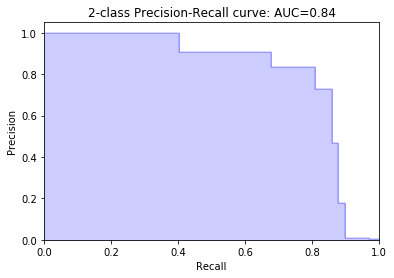

In [26]:
KNN = KNeighborsClassifier(n_neighbors=8, p=1) #use best parameters here
KNN.fit(X_train60_scaled_resampled_no_time,y_train60_resampled)

y_cv_pred_prob = KNN.predict_proba(X_cv_scaled_no_time)[:,1]
precision, recall, _ = precision_recall_curve(y_cv, y_cv_pred_prob)
area_under_curve = auc(recall,precision)


plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          area_under_curve))
print(area_under_curve)